<a href="https://colab.research.google.com/github/gitredlocus/bora/blob/master/HousingRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
%tensorflow_version 2.x
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf

print(tf.__version__)

import tensorflow_addons as tfa

#----------DATA READING 
filename = 'https://download.mlcc.google.com/mledu-datasets/california_housing_train.csv'
# read file
csv_data = pd.read_csv(filename, sep=',')

#----------DATA CLEANUP 
# drop bad data
clean_data = csv_data.dropna() 

# normalize the data
norm_data = (clean_data-clean_data.min())/(clean_data.max()-clean_data.min()) 

print(norm_data.describe())

2.3.0
          longitude      latitude  ...  median_income  median_house_value
count  17000.000000  17000.000000  ...   17000.000000        17000.000000
mean       0.476882      0.327867  ...       0.233354            0.396497
std        0.199718      0.227135  ...       0.131595            0.239141
min        0.000000      0.000000  ...       0.000000            0.000000
25%        0.254980      0.147715  ...       0.142514            0.215259
50%        0.583665      0.181722  ...       0.209976            0.341032
75%        0.632470      0.550478  ...       0.294279            0.515464
max        1.000000      1.000000  ...       1.000000            1.000000

[8 rows x 9 columns]


In [ ]:
#print(clean_data.describe())

In [ ]:
#----------TRAIN/TEST SPLIT 
train_data = norm_data.sample(frac=0.8) # take 80% randomly from the data for training
test_data = norm_data.drop(train_data.index) # reserve the rest for testing

# separate out the y (results) from x (features)
x_train = train_data.drop('median_house_value', axis=1)
y_train = train_data['median_house_value']

# separate out the y (results) from x (features)
x_test = test_data.drop('median_house_value', axis=1)
y_test = test_data['median_house_value']

print('Training Data\n', x_train.describe().transpose())
print('Test Data\n', x_test.describe().transpose())

Training Data
                       count      mean       std  ...       50%       75%  max
longitude           13600.0  0.476089  0.199702  ...  0.582669  0.632470  1.0
latitude            13600.0  0.328829  0.227396  ...  0.181722  0.550478  1.0
housing_median_age  13600.0  0.541946  0.246584  ...  0.549020  0.705882  1.0
total_rooms         13600.0  0.069557  0.057384  ...  0.055898  0.082912  1.0
total_bedrooms      13600.0  0.083517  0.065486  ...  0.067039  0.100248  1.0
population          13600.0  0.040053  0.032561  ...  0.032694  0.048180  1.0
households          13600.0  0.082273  0.063290  ...  0.067094  0.099326  1.0
median_income       13600.0  0.233088  0.131601  ...  0.209535  0.293689  1.0

[8 rows x 8 columns]
Test Data
                      count      mean       std  ...       50%       75%       max
longitude           3400.0  0.480053  0.199780  ...  0.586653  0.633466  0.972112
latitude            3400.0  0.324018  0.226079  ...  0.178533  0.548353  0.984060
hous

In [ ]:
print(len(x_train.keys()))

8


In [ ]:
#--------MODEL BUILDING
num_params = len(x_train.keys())
print(num_params)
model = tf.keras.Sequential([
    tf.keras.layers.InputLayer([num_params], name="Input_Layer"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_01"),
    tf.keras.layers.Dense(32, activation='relu', name="dense_02"),
    # 1 node in the output for the median_house_vale
    tf.keras.layers.Dense(1, name="Output_Layer")
  ])

learning_rate = 0.001
model.compile(optimizer=tf.keras.optimizers.RMSprop(learning_rate),
              # loss function to minimize
              loss='mse',
              # list of metrics to monitor
              metrics=['mae',])

model.summary()

8
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_01 (Dense)             (None, 32)                288       
_________________________________________________________________
dense_02 (Dense)             (None, 32)                1056      
_________________________________________________________________
Output_Layer (Dense)         (None, 1)                 33        
Total params: 1,377
Trainable params: 1,377
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# Fit/Train model on training data
history = model.fit(x_train, y_train,
                    batch_size=16,
                    epochs=10,
                    validation_split=0.2,
                    verbose=1)

Epoch 1/10
680/680 [==============================] - 1s 1ms/step - loss: 0.0148 - mae: 0.0853 - val_loss: 0.0141 - val_mae: 0.0832
Epoch 2/10
680/680 [==============================] - 1s 1ms/step - loss: 0.0148 - mae: 0.0852 - val_loss: 0.0140 - val_mae: 0.0816
Epoch 3/10
680/680 [==============================] - 1s 1ms/step - loss: 0.0146 - mae: 0.0850 - val_loss: 0.0140 - val_mae: 0.0804
Epoch 4/10
680/680 [==============================] - 1s 1ms/step - loss: 0.0146 - mae: 0.0846 - val_loss: 0.0154 - val_mae: 0.0913
Epoch 5/10
680/680 [==============================] - 1s 1ms/step - loss: 0.0145 - mae: 0.0846 - val_loss: 0.0140 - val_mae: 0.0846
Epoch 6/10
680/680 [==============================] - 1s 1ms/step - loss: 0.0144 - mae: 0.0841 - val_loss: 0.0138 - val_mae: 0.0819
Epoch 7/10
680/680 [==============================] - 1s 1ms/step - loss: 0.0144 - mae: 0.0841 - val_loss: 0.0140 - val_mae: 0.0849
Epoch 8/10
680/680 [==============================] - 1s 1ms/step - loss: 0.

In [ ]:
16*680

10880

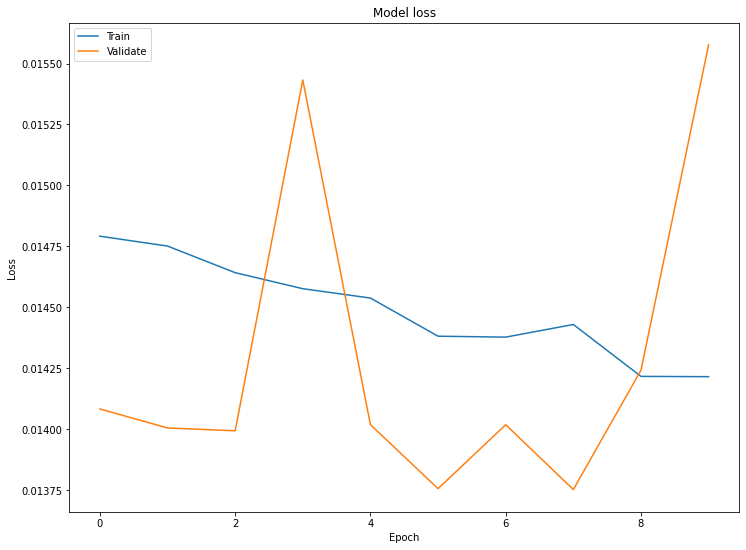

In [ ]:
#--------MONITOR
# Plot training & validation loss values
fig = plt.figure(figsize=(12,9))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validate'], loc='upper left')
plt.show()

In [ ]:
#--------EVALUATE
loss, mae = model.evaluate(x_test, y_test, verbose=2)
print('Loss:', loss, 'MAE:', mae)

107/107 - 0s - loss: 0.0147 - mae: 0.0889
Loss: 0.014724940992891788 MAE: 0.08890359848737717


In [ ]:
#--------PREDICT
p_test = model.predict(x_test)

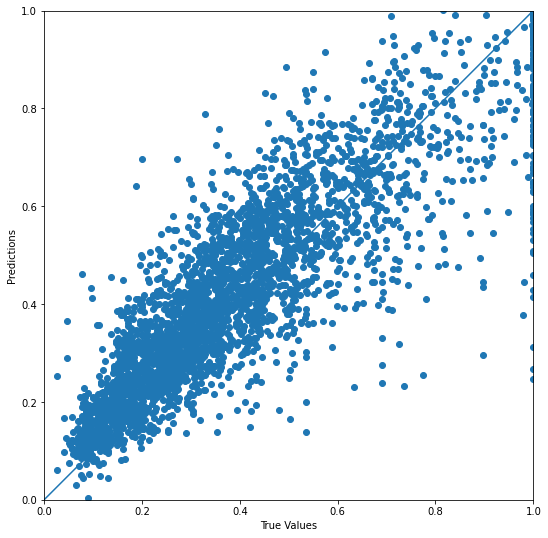

In [ ]:
#----------PLOT True Values vs. Predictions
fig = plt.figure(figsize=(9,9))
a = plt.axes(aspect='equal')
plt.scatter(y_test, p_test)
plt.xlabel('True Values')
plt.ylabel('Predictions')
lims = [0, 1]
plt.xlim(lims)
plt.ylim(lims)
# draw a diagonal line for comparison
plt.plot(lims, lims)
plt.show()

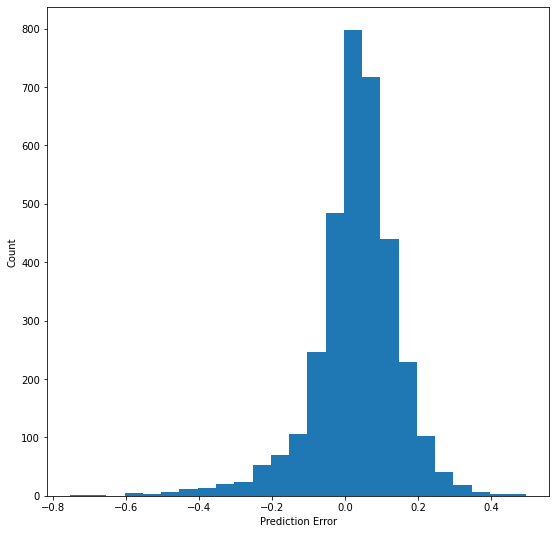

In [ ]:
#---------PLOT the distribution of errors
fig = plt.figure(figsize=(9,9))
error = p_test.flatten() - y_test
plt.hist(error, bins = 25)
plt.xlabel("Prediction Error")
plt.ylabel("Count")
plt.show()